# Gaussians (10 - 25 pts)

### 1. Explain Gaussian Mixture Model 

Gaussian Mixture Model is used for finding normally distributed subpopulations (that is, subpopulations, which points are normally distributed). 

Beforehand, we don't know any of subpopulations, so this is kind of an unsupervised learning.

To understand it better, let's see an example. We can take population of people living in Innopolis. It's obvious that there are men and women. If we take some observation, we definitely see that mean height of men is different from mean height of women, which mean they have different distribution. And we can make a third distribution by summing two previous distribution, which would be equal to different normal distribution.

# Model
$$p(x) = \Sigma^K_{k=1}\pi_k\mathcal{N}(x|\mu_k,\Sigma_k)$$
$$\mathcal{N}(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{K}|\Sigma|}}exp\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\}$$
$$\Sigma^K_{k=1}\pi_k = 1$$
# Learning
Learning is done using expectation (E) maximization technique (M) and goes as follows:
1. Initializing mean, variance, weights to random values

Untill converges:
2. E step: calculate assignment expectation of point i to cluster K based on mean value, variance/covariance, weights
3. M step: try to maximize expectations calculated in E step by updating mean value, variance/covariance, weights  

### 2. Implement Gaussian Mixture Model with EM algorithm

In [1]:
#### YOUR CODE HERE







### 3. Explain K-means Model

In [3]:
from IPython.display import display, Math, Latex

# Explanation via text and tex code 

K-means algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.
The approach k-means follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

The objective function is:

In [4]:
display(Math(r'J = \sum_{i=1}^m \sum_{k=1}^K w_{ik} \left\|{x^i - \mu_k}\right\|^2'))

<IPython.core.display.Math object>

where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0. Also, μk is the centroid of xi’s cluster.

It’s a minimization problem of two parts. We first minimize J with respect to wik and treat μk fixed. Then we minimize J with respect to μk and treat wik fixed. Technically speaking, we differentiate J with respect to wik first and update cluster assignments (E-step). Then we differentiate J with respect to μk and recompute the centroids after the cluster assignments from previous step (M-step). Therefore, E-step is:

In [5]:
display(Math(r'\frac{dJ}{d w_{ik}} = \sum_{i=1}^m \sum_{k=1}^K \left\|{x^i - \mu_k}\right\|^2 \Rightarrow w_{ik} = \begin{cases}1 if k = argmin_j\left\|x^i - \mu_j\right\|^2 \\ 0 otherwise \end{cases}'))

<IPython.core.display.Math object>

In other words, assign the data point xi to the closest cluster judged by its sum of squared distance from cluster’s centroid.

And M-step is:

In [6]:
display(Math(r'\frac{dJ}{d \mu_{k}} = 2\sum_{i=1}^m w_{ik}(x^i - \mu_k) = 0 \Rightarrow \mu_k = \frac{\sum_{i=1}^m w_{ik}x^i}{\sum_{i=1}^m w_{ik}}'))

<IPython.core.display.Math object>

Which translates to recomputing the centroid of each cluster to reflect the new assignments.

# Plot demonstration
Lets look at the plot demonstration:

In [7]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

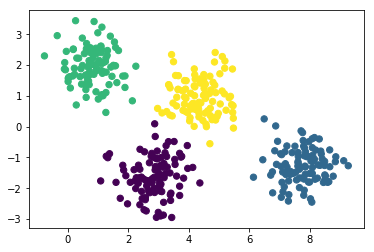

In [8]:
# Generate some data with 4 centers
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

For example, if we have simple blobs of data, the k-means algorithm can quickly label those clusters in a way that closely matches what we might do by eye.

### 4. Implement K-means from scratch

In [9]:
from sklearn.cluster import KMeans

### 5. Apply your solutions to given dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
import itertools
color_iter = itertools.cycle(['blue', 'red', 'green', 'gold', 'darkorange'])

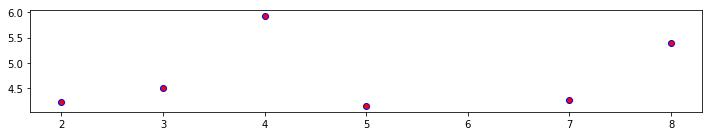

In [11]:
x = np.array([2, 3, 4, 5, 7, 8])
rnd = np.random.random(size=(1, x.size))
ch = np.random.choice([-1,+1], x.size)

y = 5 + ch*rnd
data = np.column_stack((x, y[0]))
fig, ax = plt.subplots(figsize=(10, 2))
ax.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
fig.tight_layout()

In [12]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='^', s=50, c=np.unique(labels))

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    
    

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=150, cmap='viridis', zorder=1)

    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                marker='^', s=50, c=np.unique(labels))

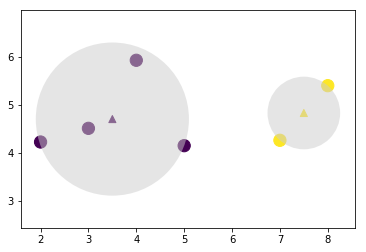

In [15]:
kmeans = KMeans(n_clusters=2)
plot_kmeans(kmeans, data, n_clusters=2)

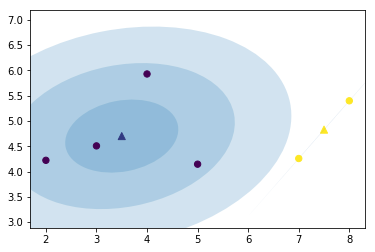

In [16]:
em_gmm = GaussianMixture(n_components=2)
plot_gmm(em_gmm, data)

### 6. Answer questions

- your two algorithms produce the same cluster centers for given data set? Provide mathematical justification (latex code)

Answer:
    
    
